# Introduction: COVID 19 ICU Admission Study

This notebook utilizes the Sirio Libanes dataset from Kaggle. Our objective is to analyze the data through all stages of the Exploratory Data Analysis (EDA) process and to perform a predictive analysis on 

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Suppress Warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

# Matplotlib and Seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

## Importing Libraries
We will import some of the standard machine learning libraries commonly used in our initial steps.

## Step 1: Ingest/Load in the data

In [2]:
# Importing csv file into dataframe
df = pd.read_excel("Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")

# Display top 10 of dataframe
df.head(10)

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                         0            1          60th       0   
1                         0            1          60th       0   
2                         0            1          60th       0   
3                         0            1          60th       0   
4                         0            1          60th       0   
5                         1            1          90th       1   
6                         1            1          90th       1   
7                         1            1          90th       1   
8                         1            1          90th       1   
9                         1            1          90th       1   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   
5                 0.0                 0.0                 0.0   
6                 0.0                 0.0                 0.0   
7                 0.0                 0.0                 0.0   
8                 0.0                 0.0                 0.0   
9                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  ...  \
0                 0.0                 1.0                 1.0  ...   
1                 0.0                 1.0                 1.0  ...   
2                 0.0                 1.0                 1.0  ...   
3                 0.0                 1.0                 1.0  ...   
4                 0.0                 1.0                 1.0  ...   
5                 0.0                 0.0                 0.0  ...   
6                 0.0                 0.0                 0.0  ...   
7                 0.0                 0.0                 0.0  ...   
8                 0.0                 0.0                 0.0  ...   
9                 0.0                 1.0                 0.0  ...   

   TEMPERATURE_DIFF  OXYGEN_SATURATION_DIFF  BLOODPRESSURE_DIASTOLIC_DIFF_REL  \
0         -1.000000               -1.000000                         -1.000000   
1         -1.000000               -1.000000                         -1.000000   
2               NaN                     NaN                               NaN   
3         -1.000000               -1.000000                               NaN   
4         -0.238095               -0.818182                         -0.389967   
5         -1.000000               -1.000000                         -1.000000   
6         -1.000000               -1.000000                         -1.000000   
7         -1.000000               -1.000000                         -1.000000   
8         -0.880952               -1.000000                         -0.906832   
9          0.142857               -0.797980                          0.315690   

   BLOODPRESSURE_SISTOLIC_DIFF_REL  HEART_RATE_DIFF_REL  \
0                        -1.000000            -1.000000   
1                        -1.000000            -1.000000   
2                              NaN                  NaN   
3                              NaN                  NaN   
4                         0.407558            -0.230462   
5                        -1.000000            -1.000000   
6                        -1.000000            -1.000000   
7                        -1.000000            -1.000000   
8                        -0.831132            -0.940967   
9                         0.200359            -0.239515   

   RESPIRATORY_RATE_DIFF_REL  TEMPERATURE_DIFF_REL  \
0                  -1.000000             -1.000000   
1                  -1.000000             -1.000000   
2                        NaN                   NaN   
3                        NaN   

### Step 2: Data Processing: Examine data (handling nulls, duplicates, erroneous, data types, structuring, etc.

In [3]:
# Reviewing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [4]:
# Reviewing the data lenght and data type
df.isna().sum()

PATIENT_VISIT_IDENTIFIER        0
AGE_ABOVE65                     0
AGE_PERCENTIL                   0
GENDER                          0
DISEASE GROUPING 1              5
                             ... 
RESPIRATORY_RATE_DIFF_REL     748
TEMPERATURE_DIFF_REL          694
OXYGEN_SATURATION_DIFF_REL    686
WINDOW                          0
ICU                             0
Length: 231, dtype: int64

In [6]:
# Reviewing the data statistical data
df.describe()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65       GENDER  DISEASE GROUPING 1  \
count               1925.000000  1925.000000  1925.000000         1920.000000   
mean                 192.000000     0.467532     0.368831            0.108333   
std                  111.168431     0.499074     0.482613            0.310882   
min                    0.000000     0.000000     0.000000            0.000000   
25%                   96.000000     0.000000     0.000000            0.000000   
50%                  192.000000     0.000000     0.000000            0.000000   
75%                  288.000000     1.000000     1.000000            0.000000   
max                  384.000000     1.000000     1.000000            1.000000   

       DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
count         1920.000000         1920.000000         1920.000000   
mean             0.028125            0.097917            0.019792   
std              0.165373            0.297279            0.139320   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       DISEASE GROUPING 5  DISEASE GROUPING 6          HTN  ...  \
count         1920.000000         1920.000000  1920.000000  ...   
mean             0.128125            0.046875     0.213021  ...   
std              0.334316            0.211426     0.409549  ...   
min              0.000000            0.000000     0.000000  ...   
25%              0.000000            0.000000     0.000000  ...   
50%              0.000000            0.000000     0.000000  ...   
75%              0.000000            0.000000     0.000000  ...   
max              1.000000            1.000000     1.000000  ...   

       RESPIRATORY_RATE_DIFF  TEMPERATURE_DIFF  OXYGEN_SATURATION_DIFF  \
count            1177.000000       1231.000000             1239.000000   
mean               -0.703683         -0.770338               -0.887196   
std                 0.482097          0.319001                0.296147   
min                -1.000000         -1.000000               -1.000000   
25%                -1.000000         -1.000000               -1.000000   
50%                -1.000000         -0.976190               -0.979798   
75%                -0.647059         -0.595238               -0.878788   
max                 1.000000          1.000000                1.000000   

       BLOODPRESSURE_DIASTOLIC_DIFF_REL  BLOODPRESSURE_SISTOLIC_DIFF_REL  \
count                       1240.000000                      1240.000000   
mean                          -0.786997                        -0.715950   
std                            0.324754                         0.419103   
min                           -1.000000                        -1.000000   
25%                           -1.000000                        -1.000000   
50%                           -1.000000                        -0.984944   
75%                           -0.645482                        -0.522176   
max                            1.000000                         1.000000   

       HEART_RATE_DIFF_REL  RESPIRATORY_RATE_DIFF_REL  TEMPERATURE_DIFF_REL  \
count          1240.000000                1177.000000           1231.000000   
mean             -0.817800                  -0.719147             -0.771327   
std               0.270217                   0.446600              0.317694   
min              -1.000000                  -1.000000             -1.000000   
25%              -1.000000                  -1.000000             -1.000000   
50%              -0.989822                  -1.000000             -0.975924   
75%              -0.662529                  -0.634409             -0.594677   
max               1.000000                   1.000000              

In [7]:
# identifying non numerical data
df.select_dtypes(exclude=['int64', 'float64']).columns

Index(['AGE_PERCENTIL', 'WINDOW'], dtype='object')

In [10]:
# showing non numerical data in a data frame
df[["AGE_PERCENTIL", "WINDOW"]]

AGE_PERCENTIL    WINDOW
0             60th       0-2
1             60th       2-4
2             60th       4-6
3             60th      6-12
4             60th  ABOVE_12
...            ...       ...
1920          50th       0-2
1921          50th       2-4
1922          50th       4-6
1923          50th      6-12
1924          50th  ABOVE_12

[1925 rows x 2 columns]

In [11]:
# Using encoding to turn percentil into numberical data
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df["AGE_PERCENTIL"])
le.classes_

array(['10th', '20th', '30th', '40th', '50th', '60th', '70th', '80th',
       '90th', 'Above 90th'], dtype=object)

In [12]:
# Transforming percentil into numerical data
df["AGE_PERCENTIL"] = le.transform(df.AGE_PERCENTIL)

In [13]:
# confirming the AGE_PERCENTIL column has been updated
df[["AGE_PERCENTIL", "WINDOW"]]

AGE_PERCENTIL    WINDOW
0                 5       0-2
1                 5       2-4
2                 5       4-6
3                 5      6-12
4                 5  ABOVE_12
...             ...       ...
1920              4       0-2
1921              4       2-4
1922              4       4-6
1923              4      6-12
1924              4  ABOVE_12

[1925 rows x 2 columns]

In [16]:
# Using encoding to turn WINDOW into numberical data
le = preprocessing.LabelEncoder()
le.fit(df["WINDOW"])
le.classes_

array(['0-2', '2-4', '4-6', '6-12', 'ABOVE_12'], dtype=object)

In [17]:
# Transforming percentil into numerical data

df["WINDOW"] = le.transform(df.WINDOW)

In [18]:
# confirming the WINDOW column has been updated
df[["AGE_PERCENTIL", "WINDOW"]]

AGE_PERCENTIL  WINDOW
0                 5       0
1                 5       1
2                 5       2
3                 5       3
4                 5       4
...             ...     ...
1920              4       0
1921              4       1
1922              4       2
1923              4       3
1924              4       4

[1925 rows x 2 columns]

In [19]:
# Verifying data is in the orginal data frame
df

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  AGE_PERCENTIL  GENDER  \
0                            0            1              5       0   
1                            0            1              5       0   
2                            0            1              5       0   
3                            0            1              5       0   
4                            0            1              5       0   
...                        ...          ...            ...     ...   
1920                       384            0              4       1   
1921                       384            0              4       1   
1922                       384            0              4       1   
1923                       384            0              4       1   
1924                       384            0              4       1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                    0.0                 0.0                 0.0   
1                    0.0                 0.0                 0.0   
2                    0.0                 0.0                 0.0   
3                    0.0                 0.0                 0.0   
4                    0.0                 0.0                 0.0   
...                  ...                 ...                 ...   
1920                 0.0                 0.0                 0.0   
1921                 0.0                 0.0                 0.0   
1922                 0.0                 0.0                 0.0   
1923                 0.0                 0.0                 0.0   
1924                 0.0                 0.0                 1.0   

      DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  ...  \
0                    0.0                 1.0                 1.0  ...   
1                    0.0                 1.0                 1.0  ...   
2                    0.0                 1.0                 1.0  ...   
3                    0.0                 1.0                 1.0  ...   
4                    0.0                 1.0                 1.0  ...   
...                  ...                 ...                 ...  ...   
1920                 0.0                 0.0                 0.0  ...   
1921                 0.0                 0.0                 0.0  ...   
1922                 0.0                 0.0                 0.0  ...   
1923                 0.0                 0.0                 0.0  ...   
1924                 0.0                 0.0                 0.0  ...   

      TEMPERATURE_DIFF  OXYGEN_SATURATION_DIFF  \
0            -1.000000               -1.000000   
1            -1.000000               -1.000000   
2                  NaN                     NaN   
3            -1.000000               -1.000000   
4            -0.238095               -0.818182   
...                ...                     ...   
1920         -1.000000               -1.000000   
1921         -1.000000               -1.000000   
1922         -1.000000               -1.000000   
1923         -1.000000               -1.000000   
1924         -0.547619               -0.838384   

      BLOODPRESSURE_DIASTOLIC_DIFF_REL  BLOODPRESSURE_SISTOLIC_DIFF_REL  \
0                            -1.000000                        -1.000000   
1                            -1.000000                        -1.000000   
2                                  NaN                              NaN   
3                                  NaN                              NaN   
4                            -0.389967                         0.407558   
...                                ...                              ...   
1920                         -1.000000                        -1.000000   
1921                         -1.000000                        -1.000000   
1922                         -1.000000                        -1.000000   
1923                         -1.000000                        -1.000000   
1924                         -0.701863       

## Dealing with null values and repeated columns

In [20]:
#Identifying null values
df.info(show_counts=True,max_cols=231)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 231 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    PATIENT_VISIT_IDENTIFIER          1925 non-null   int64  
 1    AGE_ABOVE65                       1925 non-null   int64  
 2    AGE_PERCENTIL                     1925 non-null   int32  
 3    GENDER                            1925 non-null   int64  
 4    DISEASE GROUPING 1                1920 non-null   float64
 5    DISEASE GROUPING 2                1920 non-null   float64
 6    DISEASE GROUPING 3                1920 non-null   float64
 7    DISEASE GROUPING 4                1920 non-null   float64
 8    DISEASE GROUPING 5                1920 non-null   float64
 9    DISEASE GROUPING 6                1920 non-null   float64
 10   HTN                               1920 non-null   float64
 11   IMMUNOCOMPROMISED                 1920 non-null   floa

In [21]:
# Creating new dataframe
df1=df

In [25]:
# Creating a function for using fillna to fill in the data with the missing vbalues

def fillTable(df1):
    # extract the columns that has missing or null values the patient's health data
    health_data_columns = df1.iloc[:,13:-2].columns

    # apply forward fill followed by back fill for just these columns
    health_data_filled = df1.groupby("PATIENT_VISIT_IDENTIFIER", 
                                as_index=False)[health_data_columns].\
                                 fillna(method="ffill").fillna(method="bfill")

    # creating the orignal data frame and including the missing columns and rows we did not edit
    categorical_data = df1.iloc[:,:13]

    # extract the Window and ICU data
    window_ICU_data = df1.iloc[:,-2:]

    # conbine the new data frames to make a new data frame with all the data
    filled_data = pd.concat([categorical_data,
                             health_data_filled, 
                             window_ICU_data], 
                            ignore_index=True, axis=1)
    
    # rename the columns to its original names
    filled_data.columns = df1.columns
    
    return filled_data

In [28]:
# using the function t fill in the missing data in the columns included in the function
filled_data = fillTable(df1)
filled_data.head(10)



PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  AGE_PERCENTIL  GENDER  \
0                         0            1              5       0   
1                         0            1              5       0   
2                         0            1              5       0   
3                         0            1              5       0   
4                         0            1              5       0   
5                         1            1              8       1   
6                         1            1              8       1   
7                         1            1              8       1   
8                         1            1              8       1   
9                         1            1              8       1   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   
5                 0.0                 0.0                 0.0   
6                 0.0                 0.0                 0.0   
7                 0.0                 0.0                 0.0   
8                 0.0                 0.0                 0.0   
9                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  ...  \
0                 0.0                 1.0                 1.0  ...   
1                 0.0                 1.0                 1.0  ...   
2                 0.0                 1.0                 1.0  ...   
3                 0.0                 1.0                 1.0  ...   
4                 0.0                 1.0                 1.0  ...   
5                 0.0                 0.0                 0.0  ...   
6                 0.0                 0.0                 0.0  ...   
7                 0.0                 0.0                 0.0  ...   
8                 0.0                 0.0                 0.0  ...   
9                 0.0                 1.0                 0.0  ...   

   TEMPERATURE_DIFF  OXYGEN_SATURATION_DIFF  BLOODPRESSURE_DIASTOLIC_DIFF_REL  \
0         -1.000000               -1.000000                         -1.000000   
1         -1.000000               -1.000000                         -1.000000   
2         -1.000000               -1.000000                         -1.000000   
3         -1.000000               -1.000000                         -1.000000   
4         -0.238095               -0.818182                         -0.389967   
5         -1.000000               -1.000000                         -1.000000   
6         -1.000000               -1.000000                         -1.000000   
7         -1.000000               -1.000000                         -1.000000   
8         -0.880952               -1.000000                         -0.906832   
9          0.142857               -0.797980                          0.315690   

   BLOODPRESSURE_SISTOLIC_DIFF_REL  HEART_RATE_DIFF_REL  \
0                        -1.000000            -1.000000   
1                        -1.000000            -1.000000   
2                        -1.000000            -1.000000   
3                        -1.000000            -1.000000   
4                         0.407558            -0.230462   
5                        -1.000000            -1.000000   
6                        -1.000000            -1.000000   
7                        -1.000000            -1.000000   
8                        -0.831132            -0.940967   
9                         0.200359            -0.239515   

   RESPIRATORY_RATE_DIFF_REL  TEMPERATURE_DIFF_REL  \
0                  -1.000000             -1.000000   
1                  -1.000000             -1.000000   
2                  -1.000000             -1.000000   
3                  -

In [29]:
# showing remaining missing data
filled_data.info(show_counts=True,max_cols=231)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 231 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    PATIENT_VISIT_IDENTIFIER          1925 non-null   int64  
 1    AGE_ABOVE65                       1925 non-null   int64  
 2    AGE_PERCENTIL                     1925 non-null   int32  
 3    GENDER                            1925 non-null   int64  
 4    DISEASE GROUPING 1                1920 non-null   float64
 5    DISEASE GROUPING 2                1920 non-null   float64
 6    DISEASE GROUPING 3                1920 non-null   float64
 7    DISEASE GROUPING 4                1920 non-null   float64
 8    DISEASE GROUPING 5                1920 non-null   float64
 9    DISEASE GROUPING 6                1920 non-null   float64
 10   HTN                               1920 non-null   float64
 11   IMMUNOCOMPROMISED                 1920 non-null   floa

In [30]:
# using the fillna function for the remaining missing data

filled_data.columns[filled_data.isna().any()].tolist()

['DISEASE GROUPING 1',
 'DISEASE GROUPING 2',
 'DISEASE GROUPING 3',
 'DISEASE GROUPING 4',
 'DISEASE GROUPING 5',
 'DISEASE GROUPING 6',
 'HTN',
 'IMMUNOCOMPROMISED',
 'OTHER']

In [31]:
# Total number of patients
print("Number of patients of 'new_filled_data' variable:")
len(df.groupby("PATIENT_VISIT_IDENTIFIER").count().index)

Number of patients of 'new_filled_data' variable:


385

In [32]:
# remove all rows with null data
new_filled_data = filled_data.dropna()

In [33]:
new_filled_data.isna().sum()

PATIENT_VISIT_IDENTIFIER      0
AGE_ABOVE65                   0
AGE_PERCENTIL                 0
GENDER                        0
DISEASE GROUPING 1            0
                             ..
RESPIRATORY_RATE_DIFF_REL     0
TEMPERATURE_DIFF_REL          0
OXYGEN_SATURATION_DIFF_REL    0
WINDOW                        0
ICU                           0
Length: 231, dtype: int64

In [34]:
# Only one patient was removed
print("Number of patients of 'new_filled_data' variable:")
len(new_filled_data.groupby("PATIENT_VISIT_IDENTIFIER").count().index)

Number of patients of 'new_filled_data' variable:


384

Number of patients only decreased by 1

### The purpose of the anaylsis is to be able to predict if a patient needs to be admitted into ICU or not. The windows and ICU columns are columns that we can use to identify patients that have been admitted. So therefore we need to use those columns to determine which patients we should not use in our analysis.

In [35]:
new_filled_data["ICU"].value_counts()

ICU
0    1405
1     515
Name: count, dtype: int64

In [36]:
#Creating  new dataframe to omitt the patients that has the target variable present.
patient_remove = new_filled_data.query("WINDOW =='0-2' and ICU == 1")["PATIENT_VISIT_IDENTIFIER"]

test_data = new_filled_data.query("PATIENT_VISIT_IDENTIFIER not in @patient_remove")

In [37]:
print("Number of patients of 'test_data' DataFrame:")
len(test_data.groupby("PATIENT_VISIT_IDENTIFIER").count().index)

Number of patients of 'test_data' DataFrame:


384

In [38]:
#verfying no more null values
test_data.info(show_counts=True,max_cols=231)

<class 'pandas.core.frame.DataFrame'>
Index: 1920 entries, 0 to 1924
Data columns (total 231 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    PATIENT_VISIT_IDENTIFIER          1920 non-null   int64  
 1    AGE_ABOVE65                       1920 non-null   int64  
 2    AGE_PERCENTIL                     1920 non-null   int32  
 3    GENDER                            1920 non-null   int64  
 4    DISEASE GROUPING 1                1920 non-null   float64
 5    DISEASE GROUPING 2                1920 non-null   float64
 6    DISEASE GROUPING 3                1920 non-null   float64
 7    DISEASE GROUPING 4                1920 non-null   float64
 8    DISEASE GROUPING 5                1920 non-null   float64
 9    DISEASE GROUPING 6                1920 non-null   float64
 10   HTN                               1920 non-null   float64
 11   IMMUNOCOMPROMISED                 1920 non-null   float64
 

In [39]:
test_data.describe()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  AGE_PERCENTIL       GENDER  \
count               1920.000000  1920.000000    1920.000000  1920.000000   
mean                 191.981771     0.468750       4.330729     0.369792   
std                  111.312587     0.499152       2.862580     0.482874   
min                    0.000000     0.000000       0.000000     0.000000   
25%                   95.750000     0.000000       2.000000     0.000000   
50%                  191.500000     0.000000       4.000000     0.000000   
75%                  288.250000     1.000000       7.000000     1.000000   
max                  384.000000     1.000000       9.000000     1.000000   

       DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
count         1920.000000         1920.000000         1920.000000   
mean             0.108333            0.028125            0.097917   
std              0.310882            0.165373            0.297279   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  ...  \
count         1920.000000         1920.000000         1920.000000  ...   
mean             0.019792            0.128125            0.046875  ...   
std              0.139320            0.334316            0.211426  ...   
min              0.000000            0.000000            0.000000  ...   
25%              0.000000            0.000000            0.000000  ...   
50%              0.000000            0.000000            0.000000  ...   
75%              0.000000            0.000000            0.000000  ...   
max              1.000000            1.000000            1.000000  ...   

       TEMPERATURE_DIFF  OXYGEN_SATURATION_DIFF  \
count       1920.000000             1920.000000   
mean          -0.831473               -0.919483   
std            0.287297                0.244190   
min           -1.000000               -1.000000   
25%           -1.000000               -1.000000   
50%           -1.000000               -1.000000   
75%           -0.761905               -0.919192   
max            1.000000                1.000000   

       BLOODPRESSURE_DIASTOLIC_DIFF_REL  BLOODPRESSURE_SISTOLIC_DIFF_REL  \
count                       1920.000000                      1920.000000   
mean                          -0.843309                        -0.796205   
std                            0.283063                         0.364540   
min                           -1.000000                        -1.000000   
25%                           -1.000000                        -1.000000   
50%                           -1.000000                        -1.000000   
75%                           -0.773547                        -0.731211   
max                            1.000000                         1.000000   

       HEART_RATE_DIFF_REL  RESPIRATORY_RATE_DIFF_REL  TEMPERATURE_DIFF_REL  \
count          1920.000000                1920.000000           1920.000000   
mean             -0.868908                  -0.807059             -0.832341   
std               0.236097                   0.375880              0.286119   
min              -1.000000                  -1.000000             -1.000000   
25%              -1.000000                  -1.000000             -1.000000   
50%              -1.000000                  -1.000000             -1.000000   
75%              -0.835332                  -0.787721             -0.767681   
max               1.000000                   1.000000              1.000000   

       OXYGEN_SATURATION_DIFF_REL       WINDOW          ICU  
count                 1920.000000  1920.000000  1920.000000  
mean                    -0.919374     2.000000     0

#### All of the initial preprocessing is completed. Now it is time to explore the data during the EDA steps. 

### Step 3: Exploratory Data Analysis
The purpose is to to find anomalies, patterns, trends, or relationships.

In [41]:
# using a new dataframe for EDA
EDA_Data = test_data


In [42]:
# seaborn is a graphical library
import seaborn as sns
import matplotlib.pyplot as plt

def plotGraph(data, title, x, type, y_limit = None, y=None, labels = None):
    # theme of the graphic, definition of style and font
    sns.set_theme(style = "darkgrid", font='serif', font_scale = 1.4)

    # type of the graphic and its parameters
    if type == "bar":
        ax = sns.countplot(data = data,x=x)
  
    if type == "box":
        ax = sns.boxplot(data =data, x = x, y=y)

    # size of the graphic depending of its type
    if type == "bar":
        ax.figure.set_size_inches(7,7)
  
    if type == "box":
        ax.figure.set_size_inches(5,5)

    # title (the \n is to creat an extra gap between the title and the figure)
    ax.set_title(title + "\n")

    # disable y label ("count")
    ax.set(ylabel=None)

    # x label settings (x_tick labels, disable x label and set the limit)
    ax.set_xticklabels(["No ICU (0)", "ICU (1)"])
    ax.set(xlabel=None)
  
    if y_limit != None:
        ax.set_ylim(top=y_limit)

    # to add the labels over the bars
    if labels == True:
        for rect in ax.patches:
        # find the values of each bar
            height = rect.get_height()
            width = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()
    
            # label text is exactly its height
            label_text = f'{height}'

            # parameters x and y of the label (the 0.02*y_limit in label_y is to adjust better in the fig.)
            label_x = x + width / 2
            label_y = height + (0.02*y_limit)

            # plot the label if height is different than zero
            if height != 0:
                ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=15)

    plt.show(ax)

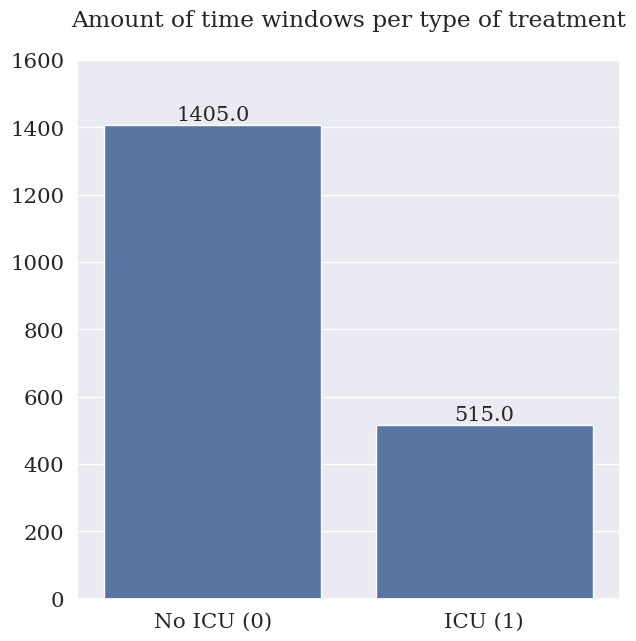

In [43]:
# "title" is one of the parameters that are necessary of the plotGraph function
title = "Amount of time windows per type of treatment"

plotGraph(data = EDA_Data, type = "bar", title = title, x="ICU", y_limit = 1600, labels=True)

In [46]:
# identifying patients admitted into ICU vs those who was not
EDA_Data.groupby("PATIENT_VISIT_IDENTIFIER").agg({"ICU": max}).value_counts()

ICU
1      195
0      189
Name: count, dtype: int64

In [48]:
# identifying patients by gender
EDA_Data.groupby("PATIENT_VISIT_IDENTIFIER").agg({"GENDER": max}).value_counts()

GENDER
0         242
1         142
Name: count, dtype: int64

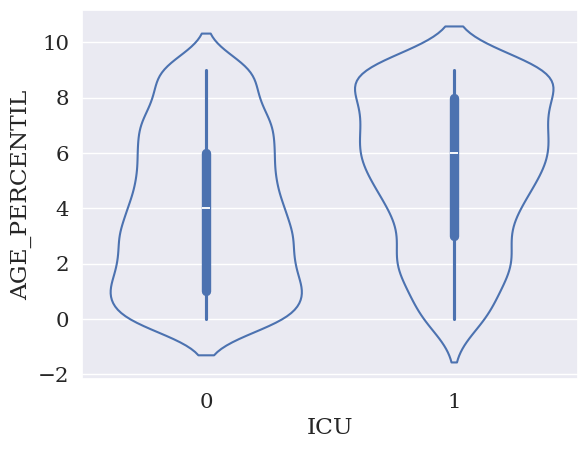

In [49]:
# Identify the age distribution of the admitted patients

sns.violinplot(data=EDA_Data, x="ICU", y="AGE_PERCENTIL", fill=False)
plt.show()

#### Creating subplots with all the numerical data

In [51]:

# Select the float64 columns from the dataset
float_columns = EDA_Data.select_dtypes(include=['float64']).columns

# Determine the number of rows and columns for subplots (adjust based on number of plots)
num_columns = 3  # Number of columns in the grid
num_rows = int(np.ceil(len(float_columns) / num_columns))  # Calculate the number of rows

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))  # Adjust figsize to fit all plots
axes = axes.flatten()  # Flatten axes array to easily iterate over

# Loop through the columns and create histograms
for i, column in enumerate(float_columns):
    axes[i].hist(EDA_Data[column], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots (in case the number of plots is not a perfect fit for the grid)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Adjust spacing between subplots to avoid title overlap
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Increase hspace (vertical space) and wspace (horizontal space)


# Show the plot
plt.show()

#### Using the above histograms, we was able to identifify the ones that had the most variation. I took the 5 I believe are the most impotant.

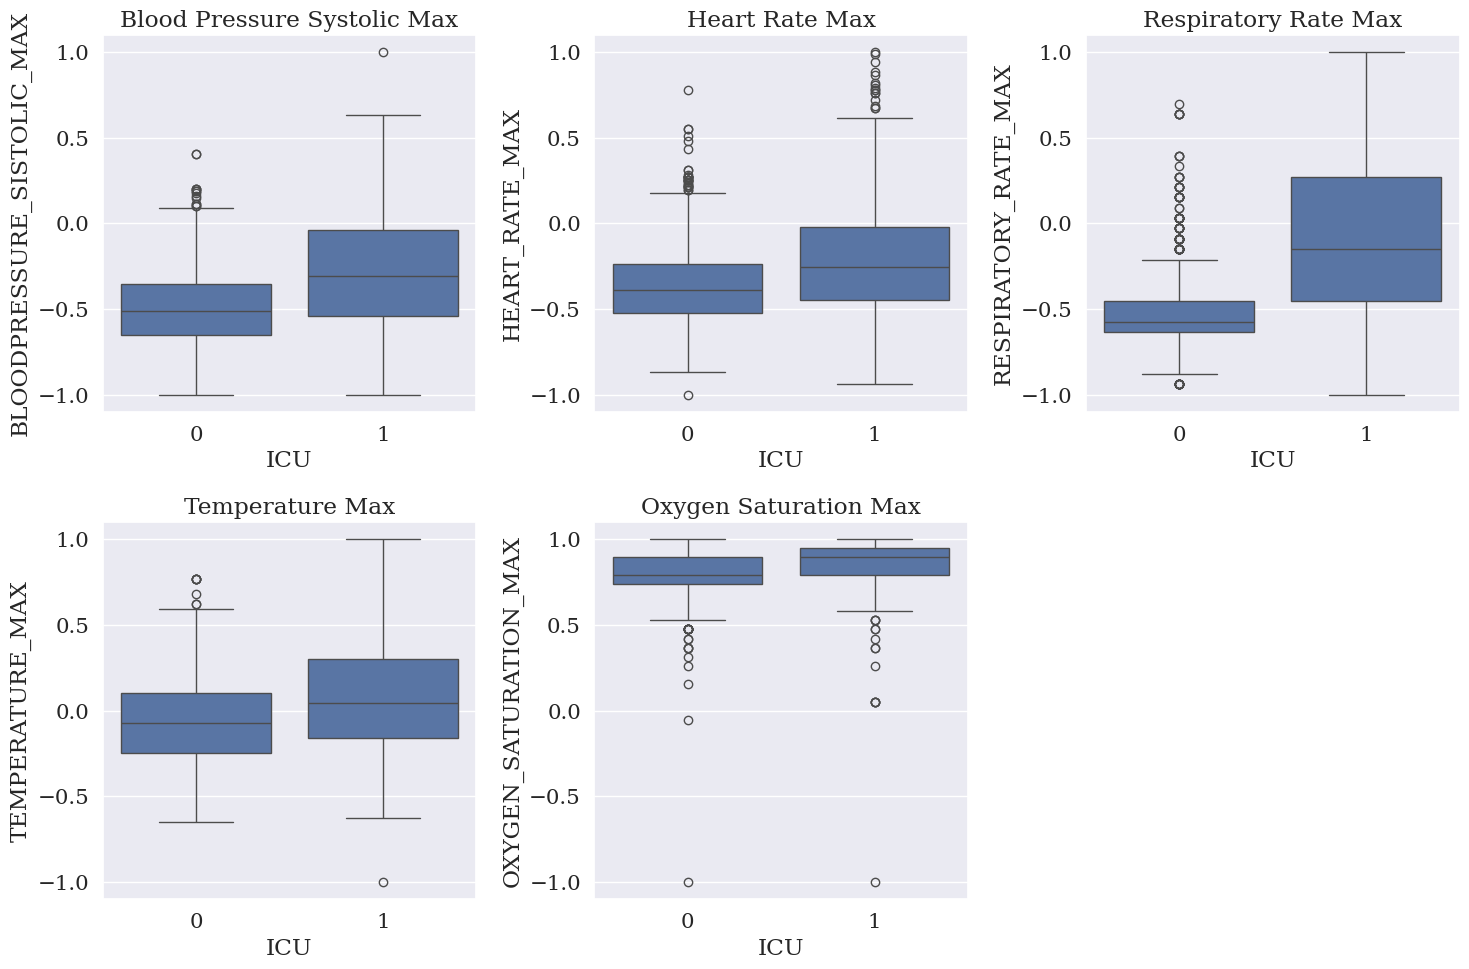

In [52]:
# Create a figure and subplots (adjust number of rows and columns as needed)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns for 5 plots (1 empty)
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot each boxplot in a subplot
sns.boxplot(data=EDA_Data, x="ICU", y="BLOODPRESSURE_SISTOLIC_MAX", ax=axes[0])
axes[0].set_title('Blood Pressure Systolic Max')

sns.boxplot(data=EDA_Data, x="ICU", y="HEART_RATE_MAX", ax=axes[1])
axes[1].set_title('Heart Rate Max')

sns.boxplot(data=EDA_Data, x="ICU", y="RESPIRATORY_RATE_MAX", ax=axes[2])
axes[2].set_title('Respiratory Rate Max')

sns.boxplot(data=EDA_Data, x="ICU", y="TEMPERATURE_MAX", ax=axes[3])
axes[3].set_title('Temperature Max')

sns.boxplot(data=EDA_Data, x="ICU", y="OXYGEN_SATURATION_MAX", ax=axes[4])
axes[4].set_title('Oxygen Saturation Max')

# Remove the unused subplot (if any)
fig.delaxes(axes[5])  # Removes the extra subplot

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

#### The EDA process is completed. Some of the trends that were discovered are as follows:
1. Data containing more patients that were admitted into ICU
2. Based on the violin plot, more patients admitted to the ICU are between the 6th and 9th age percentile, indicating that older patients are more likely to be admitted than younger patients.
3. Using the box-and-whisker plot, the oxygen rate surprisingly has a minimum impact regardless of whether the patient was admitted to the ICU.
4. Since this data is not time-stamped, the "WINDOW" does not hold much significance.

### Step 4: Building Machine Learning Models


#### Logistic Regression

In [53]:
test_data.info(show_counts=True,max_cols=231)

<class 'pandas.core.frame.DataFrame'>
Index: 1920 entries, 0 to 1924
Data columns (total 231 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    PATIENT_VISIT_IDENTIFIER          1920 non-null   int64  
 1    AGE_ABOVE65                       1920 non-null   int64  
 2    AGE_PERCENTIL                     1920 non-null   int32  
 3    GENDER                            1920 non-null   int64  
 4    DISEASE GROUPING 1                1920 non-null   float64
 5    DISEASE GROUPING 2                1920 non-null   float64
 6    DISEASE GROUPING 3                1920 non-null   float64
 7    DISEASE GROUPING 4                1920 non-null   float64
 8    DISEASE GROUPING 5                1920 non-null   float64
 9    DISEASE GROUPING 6                1920 non-null   float64
 10   HTN                               1920 non-null   float64
 11   IMMUNOCOMPROMISED                 1920 non-null   float64
 

In [54]:
test_data.shape

(1920, 231)

In [55]:
# Creating new dataframe for machine learning testing
ML_Test = test_data
ML_Test.shape




(1920, 231)

In [56]:

# Importing Library 
from sklearn.linear_model import LogisticRegression

# Perform the Train-Test Split
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = ML_Test.drop(["ICU"],axis=1)
y = ML_Test["ICU"]


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
y

0       0
1       0
2       0
3       0
4       1
       ..
1920    0
1921    0
1922    0
1923    0
1924    0
Name: ICU, Length: 1920, dtype: int64

In [58]:
# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Fit the model to the training data
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [59]:
# Predict the target variable for the testing set
y_pred = logreg_model.predict(X_test)

# Evaluate model performance
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Generate classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.859375
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       272
           1       0.84      0.64      0.73       112

    accuracy                           0.86       384
   macro avg       0.85      0.80      0.82       384
weighted avg       0.86      0.86      0.85       384



#### Decision Trees

In [60]:
# Importing Library 
from sklearn.tree import DecisionTreeClassifier
# Instantiates our Linear Regression Model
dt_classifier = DecisionTreeClassifier()
clf = dt_classifier

# Train the Model with the data
dt_classifier.fit(X_train,y_train)


DecisionTreeClassifier()

In [61]:
# Evaluate model performance
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Evaluate the model

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f'Accruacy Score: {accuracy}')


print("Classification Report: ")
print(classification_report(y_test,y_pred))

Accruacy Score: 0.8385416666666666
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       272
           1       0.75      0.67      0.71       112

    accuracy                           0.84       384
   macro avg       0.81      0.79      0.80       384
weighted avg       0.83      0.84      0.84       384



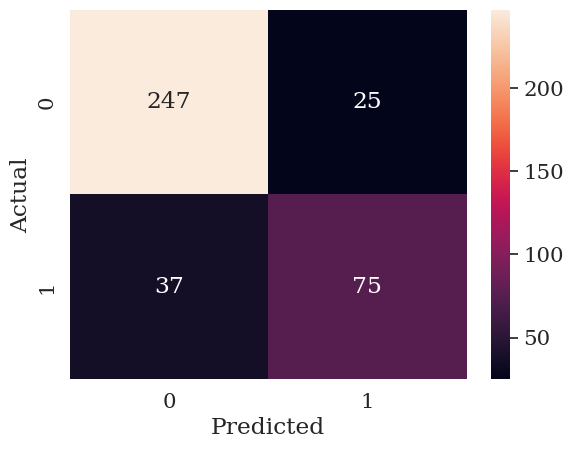

In [62]:
# Using a confusion matrix to visualized the performance of the classification 

conf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(conf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Random Forest

In [63]:
# Importing Library 
from sklearn.ensemble import RandomForestClassifier


# Instantiates our Linear Regression Model

rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3)


# Train the Model with the data
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

In [64]:
print("Classification Report: ")
print(classification_report(y_test,rf_y_pred))
print(accuracy_score(y_test,rf_y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       272
           1       0.96      0.42      0.58       112

    accuracy                           0.83       384
   macro avg       0.88      0.71      0.74       384
weighted avg       0.85      0.83      0.80       384

0.8255208333333334


### First round of testing using different models produced decent scores.
1. Logicistic Regression Accruacy 86
2. Decision Tree Accruacy 84
3. Random Forest Accruacy 83


## Optimize model using Randomized Search SV for Random Forest

After the first round of testing is completed it is time to tune the model to see if we can get a better accruacy score. Random Forest have been selected to tune the hyperparameters. Since the model contains alot of features, we believe tuning this model will yield a greater return.

#### Test 1

In [66]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [5, 25, 40]
}

# Initialize Random Search
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print(random_search.best_params_)

# Best model
best_model = random_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test,y_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 40, 'max_depth': 20}
Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       272
           1       0.84      0.70      0.76       112

    accuracy                           0.87       384
   macro avg       0.86      0.82      0.84       384
weighted avg       0.87      0.87      0.87       384



In [74]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [5, 15,25]
}

# Initialize Random Search
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print(random_search.best_params_)

# Best model
best_model = random_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test,y_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 15, 'max_depth': 10}
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       272
           1       0.84      0.62      0.71       112

    accuracy                           0.85       384
   macro avg       0.85      0.78      0.81       384
weighted avg       0.85      0.85      0.85       384



##### Test 2

In [67]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameters grid
param_grid = {
    'n_estimators': [50, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 8],
    'max_features': [25, 40, 65]
}

# Initialize Random Search
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print(random_search.best_params_)

# Best model
best_model = random_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test,y_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 40, 'max_depth': 10}
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       272
           1       0.82      0.67      0.74       112

    accuracy                           0.86       384
   macro avg       0.84      0.80      0.82       384
weighted avg       0.86      0.86      0.85       384



### After two tests, the model was able to increase the accuracy score to 86%

Understanding the amount of data that went into the initial model vs. what combination of data will yield the highest accuracy score is an important takeaway. Below is an additional analysis on the most important features when it comes to using the random forest model.

In [68]:
# creating a dataframe with just features only

features_names = X.columns
features_names

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
       ...
       'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW'],
      dtype='object', length=230)

In [70]:
feature_importances = pd.DataFrame(clf.feature_importances_, index = features_names).sort_values(0, ascending=False)
feature_importances

0
RESPIRATORY_RATE_MAX            0.310687
WINDOW                          0.099196
BIC_ARTERIAL_MAX                0.050674
BLOODPRESSURE_DIASTOLIC_MEDIAN  0.035853
LACTATE_MIN                     0.031950
...                                  ...
LINFOCITOS_DIFF                 0.000000
NEUTROPHILES_MEDIAN             0.000000
NEUTROPHILES_MEAN               0.000000
NEUTROPHILES_MIN                0.000000
P02_VENOUS_MIN                  0.000000

[230 rows x 1 columns]

In [71]:
# Ranking feature importance
features = list(feature_importances[feature_importances[0]>0].index)


<Axes: >

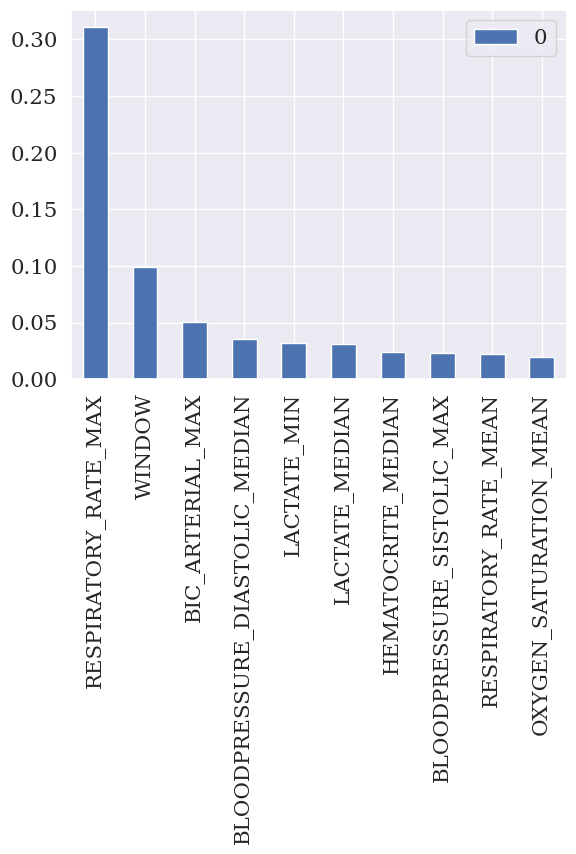

In [76]:
#Top 10 Most important features

feature_importances.head(10).plot(kind='bar')


## Conclusion